<a href="https://colab.research.google.com/github/pedro-de-bastos/CS146/blob/master/CS146_Using_Stan_for_Bayesian_Inference%2C_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prep and Imports

In [2]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Problem 1

In [3]:
#This part was taken from our clas work
waiting_times_day = np.loadtxt('https://course-resources.minerva.kgi.edu/uploaded_files/mke/00124343-8397/call-center.csv')

current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

In [64]:
data = waiting_times_per_hour[13] #data for the 13th hour

In [65]:
call_data = {
    'thirteen': {
        'alpha': 1,  # fixed prior hyperparameters for the
        'beta': 0.25,   # beta distribution
        'calls': data,  # actual data
        'num_calls':len(data) # number of calls
        }
   }

Text(0.5, 1.0, 'Gamma $\\gamma$ PDF')

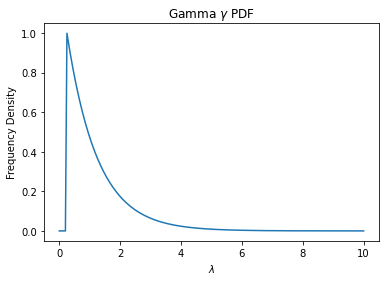

In [57]:
#How does the gamma PDF look like??
x = np.linspace(0, 10, num=200) #choosing a window to plot for x
plt.plot(x, stats.gamma.pdf(x, 1, 0.25)) #
plt.xlabel("$\lambda$")
plt.ylabel("Frequency Density")
plt.title("Gamma $\gamma$ PDF")

In [60]:
stan_code = """


data {  
    int<lower=0> num_calls;  //number of calls
    real<lower=0> calls[num_calls]; //defining a list rather than a sole real
    real<lower=0> alpha;
    real<lower=0> beta; 
}


parameters {
    real<lower=0,upper=60> lambda; //60 was arbitrary, I though it is big enough
                              
}


model {
    lambda ~ gamma(alpha, beta);  // prior over lambda
    for(i in 1:num_calls)
      calls[i] ~ exponential(lambda); //likelihood
}

"""

In [61]:
stan_model = pystan.StanModel(model_code=stan_code) #Compiling the model

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_affef14ab3e9caba788561b90478afde NOW.


In [66]:
stan_results = stan_model.sampling(data=call_data['thirteen']) #Inputting data

In [67]:
print(stan_results)

Inference for Stan model: anon_model_affef14ab3e9caba788561b90478afde.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda   6.34  8.6e-3   0.32   5.71   6.12   6.35   6.55   6.98   1412    1.0
lp__   324.31    0.02   0.73  322.2 324.17  324.6 324.76 324.81   1679    1.0

Samples were drawn using NUTS at Tue Oct 13 18:16:37 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


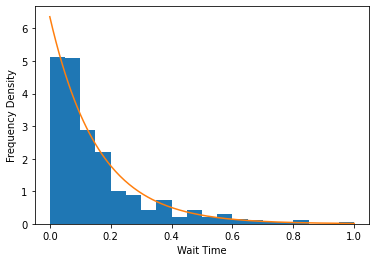

In [68]:
lambda_ = 6.35973622 #inputting the mean to create a likelihood plot

plt.hist(data, bins=20, density=True) #plotting the histogram of the data together
                                      #with the likelihood
x = np.linspace(0, max(data), 200)
y = stats.expon.pdf(x, scale=1/lambda_)
plt.plot(x, y)
plt.ylabel("Frequency Density")
plt.xlabel("Wait Time")
plt.show()

Posterior 98% confidence interval for Lambda [5.60184291 7.1047029 ]


Text(0.5, 1.0, 'Posterior Sampling')

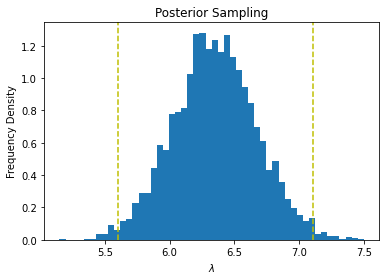

In [30]:
posterior_samples = stan_results.extract() #Extracting values of lambda from 
                                          # the posterior
confidence_intervals = np.percentile(posterior_samples['lambda'], [1, 99])

plt.hist(posterior_samples['lambda'], bins=50, density=True)
plt.axvline(x=confidence_intervals[0], linestyle='--', color='y') #Creating lines to place at the confidence interval boundaries
plt.axvline(x=confidence_intervals[1], linestyle='--', color='y')
print("Posterior 98% confidence interval for Lambda", confidence_intervals)
plt.xlabel("$\lambda$")
plt.ylabel("Frequency Density")
plt.title("Posterior Sampling")

# Problem 2: Normal Inverse Gamma

In [33]:
#Data taken from the classwork notebook
norm_data = data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

In [69]:
stan_code_norm_inv_gamma = """

data {  
    int<lower=0> num_datas; 
    real<lower=-2> datas[num_datas];
    real<lower=0> mu;
    real<lower=0> nu;
    real<lower=0> alpha;
    real<lower=0> beta;
}

parameters {
    real<lower=0> avg; 
    real<lower=0> std;
}


model {
    std ~ inv_gamma(alpha, beta); 
    avg ~ normal(mu, sqrt(std/nu));
    for(i in 1:num_datas)
      datas[i] ~ normal(avg, std);
}

"""

In [70]:
stan_model_norm_inv_gamma = pystan.StanModel(model_code=stan_code_norm_inv_gamma)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f00c75fd3299aa09d1c80f009ad824f0 NOW.


In [73]:
norm_inv_data = {
        'num_datas': len(norm_data),
        'datas': norm_data,  
        'mu': 0, 
        'nu':0.054,
        'alpha':1.12,
        'beta':0.4,
   }

In [72]:
norm_inv_sampling = stan_model_norm_inv_gamma.sampling(data=norm_inv_data)
print(norm_inv_sampling)

Inference for Stan model: anon_model_f00c75fd3299aa09d1c80f009ad824f0.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
avg    3.06  2.5e-3   0.14   2.79   2.97   3.06   3.15   3.32   2884    1.0
std    1.91  1.7e-3   0.09   1.73   1.85    1.9   1.97    2.1   3236    1.0
lp__ -231.2    0.02   1.01 -233.9 -231.6 -230.9 -230.5 -230.2   1736    1.0

Samples were drawn using NUTS at Tue Oct 13 18:20:28 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


*Note*: for some reason PyStan is sampling the variance, $\sigma$, and not $\sigma^{2}$. If I square the results, however, we obtain the results in line with the model notebook: std [2.9, 4.36]

In [38]:
samples = norm_inv_sampling.extract()

In [74]:
means = np.random.choice(samples['avg'], size=(10,))
sds = np.random.choice(samples['std'], size=(10,))

Text(0.5, 1.0, 'Plotting Samples from Posterior')

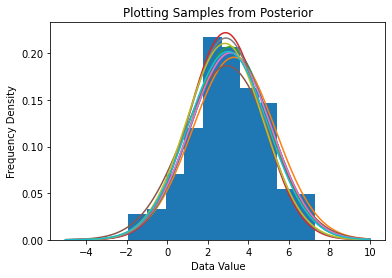

In [75]:
x = np.linspace(-5, 10, num=200)
for i, j in enumerate(zip(means, sds)):
  plt.plot(x, stats.norm.pdf(x, j[0], j[1]))

plt.hist(norm_data, density=True)
plt.xlabel("Data Value")
plt.ylabel("Frequency Density")
plt.title("Plotting Samples from Posterior")

# Problem 3: Log-Normal HRTEM Data

In [50]:
hrtem_data = pd.read_csv("https://course-resources.minerva.kgi.edu/uploaded_files/mke/00075398-1635/hrtem.csv")

(array([ 6., 13., 36., 68., 87., 60., 80., 92., 42., 15.]),
 array([0.05052906, 0.38200754, 0.71348601, 1.04496448, 1.37644295,
        1.70792142, 2.0393999 , 2.37087837, 2.70235684, 3.03383531,
        3.36531378]),
 <a list of 10 Patch objects>)

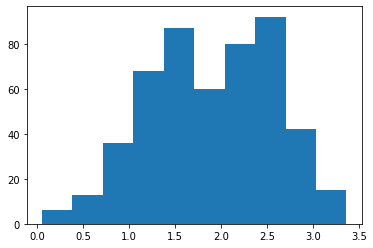

In [76]:
#Plotting both the original and log transformed data
#plt.hist(hrtem_data['1.86113123199902'])
plt.hist(np.log(hrtem_data['1.86113123199902'])) 

In [77]:
hrtem_log = hrtem_data.iloc[:,0].apply(np.log)

hrtm_log_data = {
        'num_datas': len(hrtem_log),  # fixed prior hyperparameters for the
        'datas': hrtem_log,   # beta distribution
        'mu': 2.3,  # number of patients per trial
        'nu':0.1, # number of improved patients per trial
        'alpha':2,
        'beta':5,
   }

In [52]:
log_sampling = stan_model_norm_inv_gamma.sampling(data=hrtm_log_data)
print(log_sampling)

Inference for Stan model: anon_model_c33028ab18fee1b52b89daf641e9abfa.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
avg    1.89  5.2e-4   0.03   1.84   1.87    1.9   1.92   1.95   3450    1.0
std    0.69  3.9e-4   0.02   0.65   0.68   0.69   0.71   0.74   3089    1.0
lp__ -71.83    0.02   0.97  -74.4 -72.22 -71.54 -71.14 -70.88   1874    1.0

Samples were drawn using NUTS at Tue Oct 13 17:45:45 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [53]:
log_samples = log_sampling.extract()
log_means = np.exp(np.random.choice(log_samples['avg'], size=(10,)))
log_sds = np.random.choice(log_samples['std'], size=(10,))

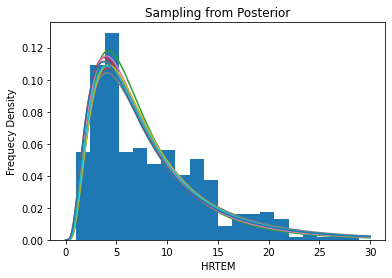

In [54]:
x = np.linspace(0, 30, num=200)
plt.hist(hrtem_data.iloc[:,0], bins=20, density=True)
for i, j in enumerate(zip(log_sds, log_means)):
  plt.plot(x, stats.lognorm.pdf(x, j[0], scale=j[1]))

plt.title("Sampling from Posterior")
plt.xlabel("HRTEM")
plt.ylabel("Frequecy Density")
plt.show()